In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#import CSV files into DataFrame Bandas
df1=pd.read_csv('/content/drive/MyDrive/0001Submission/Data/inDataForModels/df_TrainOutFinal.csv')
df2=pd.read_csv('/content/drive/MyDrive/0001Submission/Data/inDataForModels/df_TestOutFinal.csv')

In [30]:
df1.shape,df2.shape

((7516115, 9), (940628, 9))

In [31]:
df1.head(5)

,QuestionId,UserId,Gender,Age,GroupId,QuizId,2,3,IsCorrect
0,15911,50013,1,14.0,4975,17226,42.0,211.0,0
1,15911,59114,0,12.0,3874,17226,42.0,211.0,1
2,15911,19121,1,13.0,10399,17226,42.0,211.0,0
3,15911,112781,2,14.0,10035,17226,42.0,211.0,0
4,15911,15277,1,33.0,6005,17226,42.0,211.0,1


In [32]:
df2.head(5)

,QuestionId,UserId,Gender,Age,GroupId,QuizId,2,3,IsCorrect
0,10856,5518,2,17.0,2143,13180,36.0,224.0,1
1,10856,65834,0,12.0,3644,13180,36.0,224.0,1
2,10856,32841,1,12.0,7900,13180,36.0,224.0,1
3,10856,24996,1,17.0,7331,13180,36.0,224.0,1
4,10856,12067,1,16.0,8482,13180,36.0,224.0,1


In [33]:
X=df1
y=df1['IsCorrect']
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


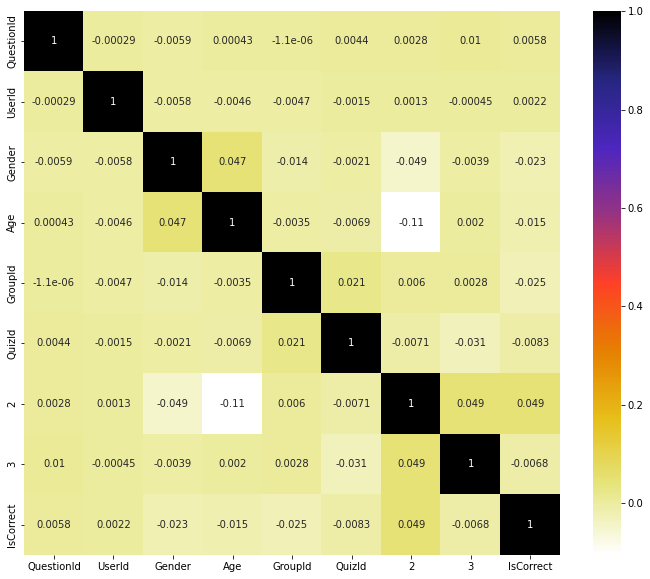

In [34]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [35]:


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

In [36]:
corr_features

set()

In [37]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,QuestionId,UserId,Gender,Age,GroupId,QuizId,2,3,IsCorrect
3340131,20672,64461,0,12.0,18,10188,39.0,226.0,1
640340,26941,108662,2,15.0,1529,8120,39.0,227.0,1
425755,19575,6167,1,13.0,2435,6182,144.0,202.0,1
296868,17423,111316,2,12.0,1475,14864,141.0,213.0,1
1395625,2328,51687,1,12.0,5735,6963,42.0,211.0,0
...,...,...,...,...,...,...,...,...,...
4773613,11165,80044,0,13.0,7637,1247,144.0,204.0,1
2442164,7266,107215,2,15.0,4186,5972,40.0,247.0,1
5872123,5933,112787,0,13.0,1398,1506,46.0,334.0,1
7240428,15580,59238,2,13.0,2580,5635,46.0,334.0,1
